In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

def plotInterPREdata(ax,ff,label,protein,c):
    calcPREsV = protein.loc['calcPREs',ff].value[label]
    calcPREsE = protein.loc['calcPREs',ff].error[label]
    expPREsV = protein.loc['expPREs',ff].value[label]
    expPREsE = protein.loc['expPREs',ff].error[label]

    ax.errorbar(expPREsV.index,expPREsV.values,expPREsE.values, color='k', lw=0, 
        marker='o', ms=1, elinewidth=.5, capsize=1, capthick=.5)    
    ax.plot(calcPREsV.index, calcPREsV.values, color=c, lw=0.5,marker='o',ms=1)
    ax.set_xticks(expPREsV.index[9::10])

FUS, tau_c (ns) @ min chi2
1.00    1.0
1.06    2.0
1.08    7.0
dtype: float64
FUS, min chi2
1.00    24.724947
1.06    26.642436
1.08    29.859289
dtype: float64


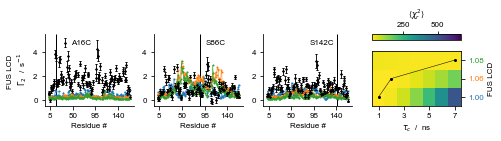

In [2]:
fig, up = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(7,2))

FUS = pd.read_pickle('../PRE_NMR/interchain/chi2_FUS_tc.pkl').astype(float)[:8].T
print('FUS, tau_c (ns) @ min chi2')
print(FUS.idxmin(axis=1))
print('FUS, min chi2')
print(FUS.min(axis=1))
im = up[-1].pcolor(FUS,cmap=plt.cm.viridis_r)#,vmin=10,vmax=60)
divider = make_axes_locatable(up[-1])
cax1 = divider.new_vertical(size="10%", pad=.15)
fig.add_axes(cax1)
plt.colorbar(im, cax=cax1, orientation="horizontal", label=r'$\langle \chi^2_r \rangle$')
cax1.xaxis.set_ticks_position('top')
cax1.xaxis.set_label_position('top')
up[-1].set_ylabel('FUS LCD')
up[-1].yaxis.set_ticks_position('right'); up[-1].yaxis.set_label_position('right')
up[-1].plot(FUS.T.idxmin()-.5,np.arange(.5,FUS.shape[0],1),'ko-',ms=2,lw=.5)
up[-1].set_yticks(np.arange(.5,FUS.shape[0],1))
up[-1].set_yticklabels(['1.00','1.06','1.08'])
up[-1].set_xticks(np.arange(.5,FUS.shape[1],2))
up[-1].set_xticklabels(np.arange(1,FUS.shape[1],2))
up[-1].set_xlabel(r'$\tau_c$  /  ns')
up[-1].set_xlim(0,7)

protein = pd.read_pickle('../PRE_NMR/interchain/FUS_PREs.pkl')
for ax,label,aa,delta in zip(up[:3],[16,86,142],['A','S','S'],[30,10,-55]):
    ax.vlines(label,-.5,5.5,lw=1,color='k')
    plotInterPREdata(ax,'1.00',label,protein,'tab:blue')
    plotInterPREdata(ax,'1.06',label,protein,'tab:orange')
    plotInterPREdata(ax,'1.08',label,protein,'tab:green')
    ax.set_ylim(-.5,5.5)
    ax.set_xticks(np.arange(5,180,45))
    ax.set_xlabel('Residue #')
    ax.annotate(aa+str(label)+'C',xy=(label+delta,4.6),color='k')
up[0].set_ylabel('FUS LCD \n $\Gamma_2$  /  s$^{-1}$')
 

for ticklabel, tickcolor in zip(up[-1].get_yticklabels(), 
                                ['tab:blue','tab:orange','tab:green']):
    ticklabel.set_color(tickcolor)

for ax in up[:3]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

fig.tight_layout()
plt.savefig('../interPRE.pdf',dpi=300)